<a href="https://colab.research.google.com/github/JuanM-GG/sistemas-dinamicos-R/blob/main/exercise_2.7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Title: Exercise 2.7

Name: JM

Date: December 2020 

Two liquid tanks (with constant coss-sectional area) are placed in series. Write the modeling equations for height of liquid in the tanks assuming that the flowrate from the first tank is a function of the difference in levels of the tanks and the flowrate from the second tank is a function of the level in the second tank. Consider two cases: (i) the function is linear and (ii) the function is a square root relationship. State all assumptions. 

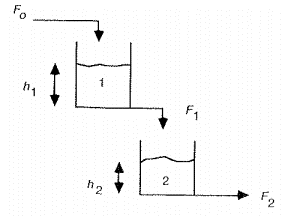

### Material Balance Tank 1

$$\frac{d(V_1 \rho)}{dt} = F_{in} \rho - F(h_1,h_2) \rho$$

$$\frac{d(A_1 h_1 \rho)}{dt} = F_{in} \rho - F(h_1,h_2) \rho$$

$$ A_1 \rho \frac{dh_1}{dt} = F_{in} \rho - F(h_1,h_2) \rho$$

$$ \frac{dh_1}{dt} = \frac{F_{in}}{A_1} - \frac{F(h_1,h_2)}{A_1} $$

### Material Balance Tank 2

$$\frac{d(V_2 \rho)}{dt} = F(h_1,h_2) \rho - G(h_2) \rho$$

$$ A_2 \rho \frac{dh_2}{dt} = F(h_1,h_2) \rho - G(h_2) \rho$$

$$ \frac{dh_2}{dt} = \frac{F(h_1,h_2)}{A_2} - \frac{G(h_2)}{A_2}$$

In [1]:
# load libraries
install.packages("deSolve")
library(deSolve)
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
# establish model 
model <- function(times,state,parms, input) {
  with(as.list(c(state,parms, input)), {

    # F1 = k1*(h1 - h2)
    F1 = k1*sqrt(h1 - h2)
    # G2 = k2*h2
    G2 = k2*sqrt(h2)

    dh1dt = Fin/A1 - F1/A1
    dh2dt = F1/A1 - G2/A2

    return(list(c(dh1dt,dh2dt)))
  })
}

In [4]:
# establish parameters
p <- c(k1=0.1,k2=0.1,A1=2,A2=2)

In [5]:
# establish initial conditions
s <- c(h1=0.5,h2=0)

In [6]:
# integration time
times <- seq(0,5000,len=1000)

In [7]:
# input variables
input <- c(Fin = 0.5)

In [9]:
# solve ODEs
out <- ode(y = s,times = times, func = model, method = "rk4", input = input, parms = p)

In [10]:
# save results
data <- as.data.frame(out)

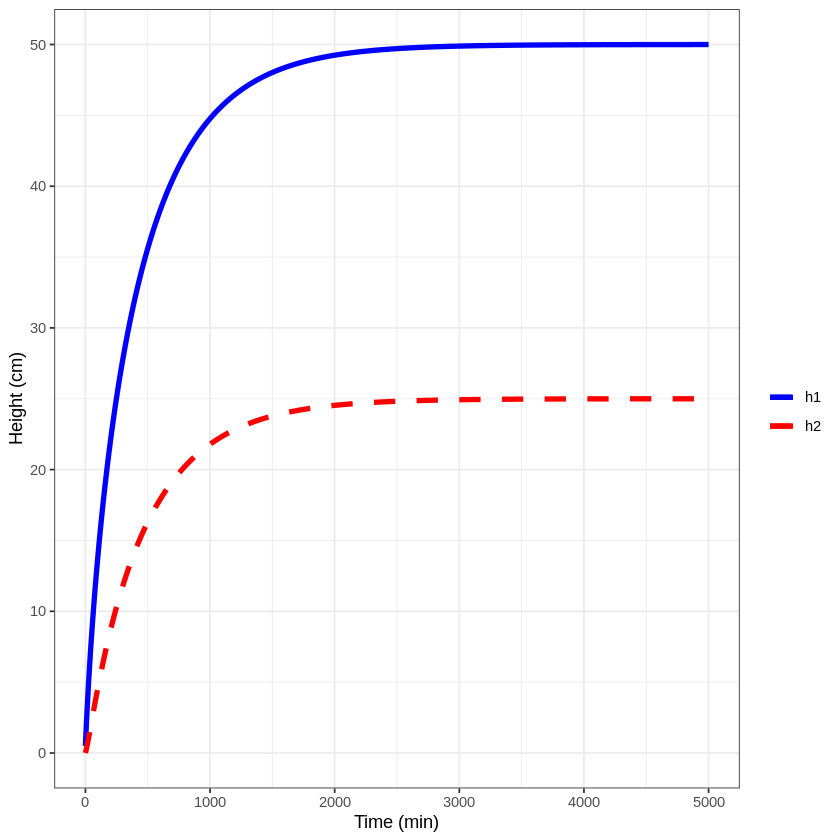

In [13]:
# show results
ggplot(data,aes(times)) +
        geom_line(aes(y = h1, color = "h1"), lwd = 1.5) +
        geom_line(aes(y = h2, color = "h2"), lwd = 1.5, lty = 2) +
        xlab("Time (min)") +
        ylab("Height (cm)") +
        scale_colour_manual("", 
                      breaks = c("h1", "h2"),
                      values = c("blue","red")) +
        theme_bw()